# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,5.0)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

# Importing Dataset

In [2]:
data = pd.read_csv(r"C:\Users\rinuj\customers.csv")
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [4]:
display(data.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019447ADDE80>,
      dtype=object)

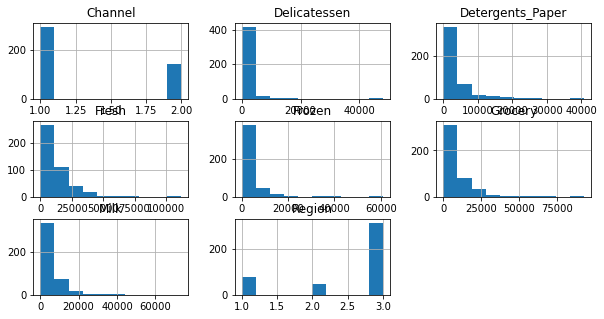

In [5]:
data.hist()

# Data Preprocessing

# Missing Value Handling

In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

There are no missing values in the dataset

# Feature Selection

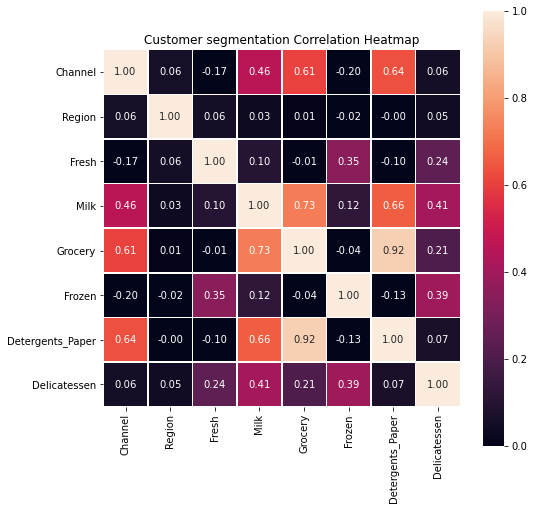

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot = True, vmin=0, vmax=1, linewidths=.5, square = True, fmt='.2f', ax=ax)
plt.title("Customer segmentation Correlation Heatmap")
plt.show()

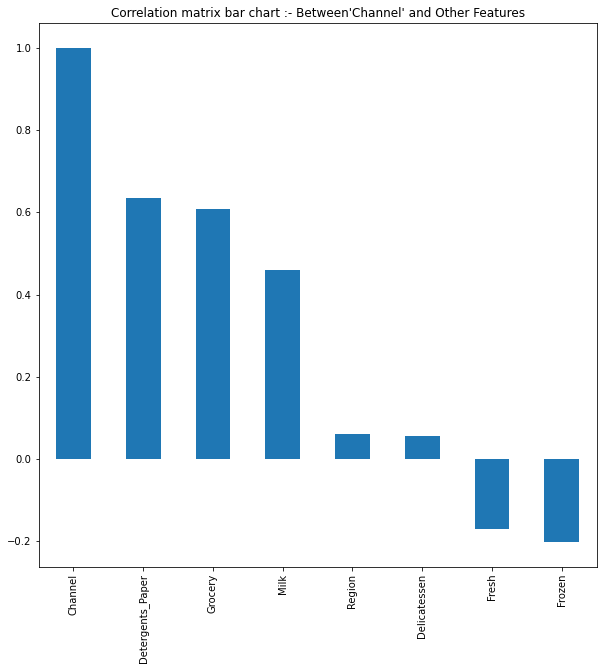

In [8]:
corr_matrix = data.corr()
plt.figure(figsize = (10,10))
plt.title("Correlation matrix bar chart :- Between'Channel' and Other Features")
customer_corr = corr_matrix['Channel'].sort_values(ascending = False)
customer_corr.plot.bar()

# Outlier Detection and Removal

In [9]:

# List of all outliers# List o 
outliers = []

# For each feature find the data points with extreme high or low values
for feature in data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print ("Outlier step:", step)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    temp_outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(temp_outliers)
    
    outliers += temp_outliers.index.tolist()
    
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Outlier step: 1.5
Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Outlier step: 1.5
Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Outlier step: 20709.0
Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
29,1,3,43088,2100,2609,1200,1107,823
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
52,2,3,40721,3916,5876,532,2587,1278
87,1,3,43265,5025,8117,6312,1579,14351
103,1,3,56082,3504,8906,18028,1480,2498
125,1,3,76237,3473,7102,16538,778,918
129,1,3,42312,926,1510,1718,410,1819
176,1,3,45640,6958,6536,7368,1532,230
181,1,3,112151,29627,18148,16745,4948,8550


Outlier step: 8485.875
Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,2,3,26373,36423,22019,5154,4337,16523
28,2,3,4113,20484,25957,1158,8604,5206
38,2,3,4591,15729,16709,33,6956,433
45,2,3,5181,22044,21531,1740,7353,4985
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944


Outlier step: 12754.125
Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
28,2,3,4113,20484,25957,1158,8604,5206
43,2,3,630,11095,23998,787,9529,72
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903


Outlier step: 4218.0
Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
22,1,3,31276,1917,4469,9408,2381,4334
39,1,3,56159,555,902,10002,212,2916
40,1,3,24025,4332,4757,9510,1145,5864
47,2,3,44466,54259,55571,7782,24171,6465
70,1,3,16705,2037,3202,10643,116,1365
72,1,3,4420,5139,2661,8872,1321,181
73,2,3,19899,5332,8713,8132,764,648
88,1,3,7864,542,4042,9735,165,46
91,1,3,12754,2762,2530,8693,627,1117
93,1,3,11314,3090,2062,35009,71,2698


Outlier step: 5497.875
Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
43,2,3,630,11095,23998,787,9529,72
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
92,2,3,9198,27472,32034,3232,18906,5130


Outlier step: 2118.0
Data points considered outliers for the feature 'Delicatessen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
24,2,3,22647,9776,13792,2915,4482,5778
28,2,3,4113,20484,25957,1158,8604,5206
36,1,3,29955,4362,5428,1729,862,4626
40,1,3,24025,4332,4757,9510,1145,5864
45,2,3,5181,22044,21531,1740,7353,4985


In [10]:
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)
good_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
327,1,3,21117,1162,4754,269,1328,395
328,1,3,1982,3218,1493,1541,356,1449
329,1,3,16731,3922,7994,688,2371,838
330,1,3,10290,1981,2232,1038,168,2125


# Unsupervised Learning- kmeans

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Create range of clusters 
cluster_ranges = list(range(2,11)); cluster_ranges

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
#k-means for clustering
# k-means: Loop through clusters
silhouette_coefficients = []
for i in cluster_ranges:
    # Apply your clustering algorithm to the good data 
    clusterer = KMeans(n_clusters=i).fit(good_data.iloc[:,1:])
    # Predict the cluster for each data point
    preds = clusterer.predict(good_data.iloc[:,1:])
    #Find the cluster centers
    centers = clusterer.cluster_centers_
    print(centers)
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(good_data.iloc[:,1:])
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(good_data.iloc[:,1:], preds, metric='euclidean')
    silhouette_coefficients.append(score)
    print("When the cluster_size is {}, the AVG silhouette_score is : {}".format(i, score))
#fig, bx = plt.subplots()
#gd_data = pd.DataFrame(good_data)
#data = gd_data.ravel()
#bx.scatter(data[:,0], data[:,1], c = kmeans.labels_, cmap='rainbow', label = 'hi', s = 50)
#bx.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = '*', c = 'black', s=200)

[[2.53125000e+00 2.01763958e+04 3.48861458e+03 4.93440625e+03
  2.13116667e+03 1.18444792e+03 1.24346875e+03]
 [2.54237288e+00 5.22373729e+03 4.35598729e+03 6.25847881e+03
  1.75398305e+03 2.27403814e+03 9.24317797e+02]]
When the cluster_size is 2, the AVG silhouette_score is : 0.3991243604161397
[[2.65060241e+00 4.56975904e+03 8.03572289e+03 1.25365663e+04
  1.25891566e+03 5.15666265e+03 1.27602410e+03]
 [2.49397590e+00 6.19343373e+03 2.42697590e+03 2.98081325e+03
  2.01641566e+03 7.51554217e+02 7.62204819e+02]
 [2.51807229e+00 2.12329639e+04 3.53104819e+03 5.00426506e+03
  2.16044578e+03 1.17613253e+03 1.26597590e+03]]
When the cluster_size is 3, the AVG silhouette_score is : 0.3979324394897604
[[2.65384615e+00 4.67475641e+03 8.17961538e+03 1.28683205e+04
  1.31860256e+03 5.29389744e+03 1.30364103e+03]
 [2.48275862e+00 2.78730690e+04 5.07241379e+03 6.83037931e+03
  2.15382759e+03 1.48275862e+03 1.35148276e+03]
 [2.47101449e+00 4.68947101e+03 2.50579710e+03 2.99877536e+03
  1.96179710

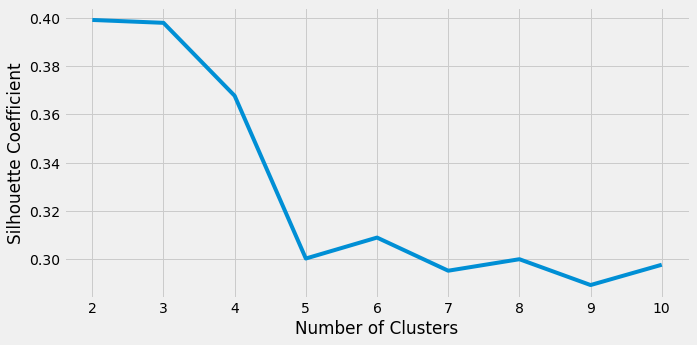

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Supervised Learning

# Test Train split

In [14]:
#Splitting dataset for classification
#creating test and train sets
x_train, x_test,y_train,y_test = train_test_split(good_data.iloc[:,1:],good_data.iloc[:,0],test_size=0.3)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

(232, 7) (100, 7)
(232,) (100,)


# Feature Scaling

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape, x_test.shape)

(232, 7) (100, 7)


# Classification using Naive Bayes

In [16]:
#fit the model
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

[[66  6]
 [ 5 23]]


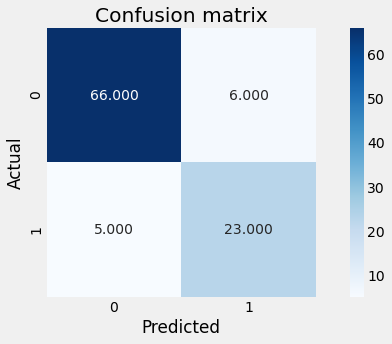

In [17]:
#make prediction
y_pred = nb.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [18]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.89 
Error =  0.10999999999999999 
Precision = [0.92957746 0.79310345] 
Recall =  [0.91666667 0.82142857] 
F1 Score =  [0.92307692 0.80701754]


# Classification using SVM classifier

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train,y_train)

SVC(gamma='auto')

[[69  3]
 [ 5 23]]


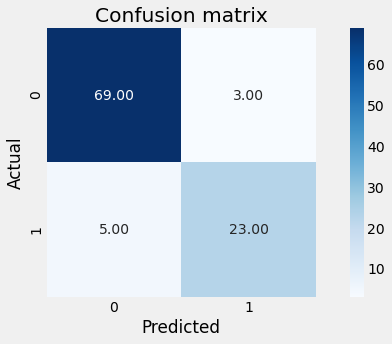

In [20]:
y_pred = classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [21]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.92 
Error =  0.07999999999999996 
Precision = [0.93243243 0.88461538] 
Recall =  [0.95833333 0.82142857] 
F1 Score =  [0.94520548 0.85185185]


# Feature Transformation-PCA

In [22]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 2)
components = pca.fit_transform(good_data)

# Transform log_samples using the PCA fit above
pca_df = pd.DataFrame(data = components
             , columns = ['principal component 1', 'principal component 2'])


#Generate PCA results plot
#pca_results = vs.pca_results(good_data, pca)

In [23]:
final_df = pd.concat([pca_df, pd.DataFrame(good_data.iloc[:,0])], axis = 1)
final_df

,principal component 1,principal component 2,Channel
0,2193.462447,4864.859617,2
1,-3610.093561,5552.398371,2
2,4493.988155,-2558.179002,1
3,-381.974053,1318.786352,2
4,2233.731670,1402.922911,2
...,...,...,...
327,11712.272693,-77.798550,1
328,-6480.856214,-5917.508563,1
329,6607.683764,3235.794254,1
330,1631.760727,-4226.736101,1


# Unsupervised Learning- kmeans With PCA

In [24]:
# k-means: Loop through clusters
silhouette_coefficients = []
for i in cluster_ranges:
    # Apply your clustering algorithm to the reduced data 
    clusterer = KMeans(n_clusters=i).fit(pca_df)
    # Predict the cluster for each data point
    preds = clusterer.predict(pca_df)
    # Find the cluster centers
    centers = clusterer.cluster_centers_
    print(centers)
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_df)
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(final_df, preds, metric='euclidean')
    silhouette_coefficients.append(score)
    print("When the cluster_size is {}, the AVG silhouette_score is : {}".format(i, score))

[[-4346.43073432  -349.49409784]
 [10684.97555521   859.17299052]]
When the cluster_size is 2, the AVG silhouette_score is : 0.4402683647328758
[[-2589.51790894 -4221.04401293]
 [-6480.17424689  7159.98062257]
 [11706.08544234  1144.98662454]]
When the cluster_size is 3, the AVG silhouette_score is : 0.4579034232177087
[[-3974.84070917 -4384.71093925]
 [ 6597.03858089 -1382.78320864]
 [-6556.0662702   7595.43869545]
 [17875.19822866  5011.95247117]]
When the cluster_size is 4, the AVG silhouette_score is : 0.44401808337100845
[[18533.89704667  4765.96163742]
 [-6501.53693794 -4381.61754142]
 [ 7979.55336632  -469.16773393]
 [-6529.12049623  7757.51879937]
 [  185.69200852 -3911.30735654]]
When the cluster_size is 5, the AVG silhouette_score is : 0.3927266291262059
[[  359.57857821 -3670.94596008]
 [-7714.7890824   7134.81922904]
 [19247.19161003  4329.20261322]
 [-6342.95021343 -4578.75419998]
 [ 4048.17300203  7468.14059376]
 [ 8857.99567796 -2329.23201756]]
When the cluster_size is 6

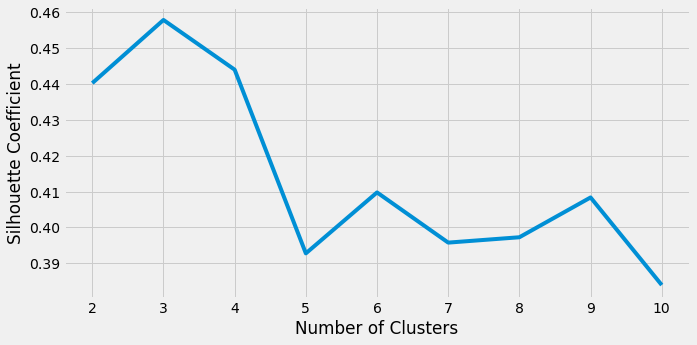

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Test Train split

In [26]:
#Splitting dataset for classification
#creating test and train sets
x_train, x_test,y_train,y_test = train_test_split(final_df.iloc[:,:-1],final_df.iloc[:,-1] ,test_size=0.3)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(232, 2) (100, 2)
(232,) (100,)


# Feature Scaling

In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape, x_test.shape)

(232, 2) (100, 2)


# Classification using Naive Bayes with PCA

In [28]:
#fit the model
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

[[63  2]
 [ 7 28]]


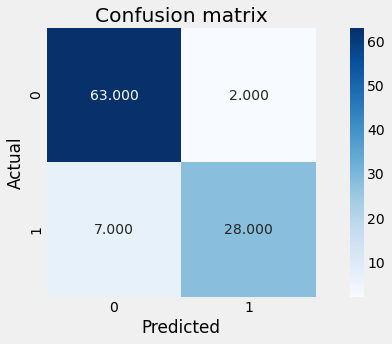

In [29]:
#make prediction
y_pred = nb.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [30]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.91 
Error =  0.08999999999999997 
Precision = [0.9        0.93333333] 
Recall =  [0.96923077 0.8       ] 
F1 Score =  [0.93333333 0.86153846]


# Classification using SVM classifier with PCA

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train,y_train)

SVC(gamma='auto')

[[59  6]
 [ 3 32]]


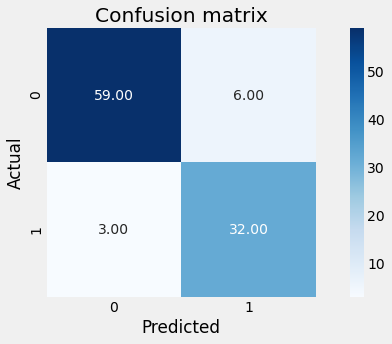

In [32]:
y_pred = classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [33]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.91 
Error =  0.08999999999999997 
Precision = [0.9516129  0.84210526] 
Recall =  [0.90769231 0.91428571] 
F1 Score =  [0.92913386 0.87671233]
